In [4]:
import statsmodels.api as sm
import statsmodels.stats.diagnostic

import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

from statsmodels.tsa.api import VAR

def rmse(pred, actual):
    return np.sqrt(((pred - actual) ** 2).mean())


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Import Statsmodels
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse, aic


In [5]:
# LOAD DATA

data_path = "../Year data P//"


df = pd.read_csv(data_path + 'Australia//Australia data3.csv')
df = df.loc[df['year'] >= 1980]
df = df.drop(['countrycode','country','currency_unit','year'],axis = 1)
year = pd.period_range('1980', '2019', freq='Y')
df.index = year


In [6]:
df.tail()

,GDP,net population growth,CPI,employment rate,labsh,xr,pl_gdpo,csh_c,csh_i,csh_g,...,csh_m,csh_r,pl_c,pl_i,pl_g,pl_x,pl_m,pl_n,pl_k,GDP.1
2015,2.286583,0.014243,1.508367,0.006344,0.013426,1.331090,-0.120854,0.043607,-0.080548,0.112269,...,-0.005382,-0.450512,-0.142073,-0.076549,-0.183507,-0.102930,-0.089396,-0.104003,-0.171759,2.286583
2016,2.707033,0.013798,1.276991,-0.000103,-0.033361,1.345214,-0.017795,-0.030156,-0.071559,-0.004074,...,-0.110539,-1.447050,-0.013508,0.003072,-0.016066,-0.013670,-0.004671,0.002245,0.088960,2.707033
2017,2.407000,0.013268,1.948647,0.007552,-0.007058,1.304758,0.038500,-0.025008,-0.030714,0.013261,...,0.069608,-0.508163,0.058873,0.092419,0.028951,0.012173,0.084494,0.140201,0.111690,2.407000
2018,2.822740,0.012753,1.911401,0.011071,-0.013990,1.338412,-0.015046,-0.027288,-0.075311,0.011036,...,-0.057765,3.699859,-0.007520,0.007343,-0.009032,0.030537,0.045068,0.004718,-0.005463,2.822740
2019,1.955424,0.012252,1.610768,0.006976,0.000000,1.438507,-0.057326,-0.033483,-0.054413,0.067472,...,-0.033014,-0.575282,-0.053170,-0.043538,-0.058831,-0.009819,-0.031006,-0.054919,-0.077074,1.955424


In [7]:
from sklearn.preprocessing import MinMaxScaler
Xscaler =MinMaxScaler()
df.iloc[:,0:-1]=Xscaler.fit_transform(df.values[:,0:-1])

In [8]:
df_train = df['1980':'2009']
df_test = df['2010':'2019']

In [9]:
for i in range(0,20):
    adfResult = sm.tsa.stattools.adfuller(df_train.iloc[:,i])
    if adfResult[1]<0.05:
        print(i)
        print(df.columns[i])
        print("stable")
    else:
        print(i)
        print(df.columns[i])
        print("UNstable")

0
GDP
UNstable
1
net population growth
stable
2
CPI
UNstable
3
employment rate
stable
4
labsh
stable
5
xr
stable
6
pl_gdpo
stable
7
csh_c
stable
8
csh_i
stable
9
csh_g
stable
10
csh_x
UNstable
11
csh_m
stable
12
csh_r
stable
13
pl_c
stable
14
pl_i
stable
15
pl_g
stable
16
pl_x
stable
17
pl_m
stable
18
pl_n
stable
19
pl_k
stable


In [10]:
df_train.iloc[:,0] = df_train.iloc[:,0].diff(1)
df_train.iloc[:,2] = df_train.iloc[:,2].diff(1)
df_train.iloc[:,10] = df_train.iloc[:,10].diff(1)


df_test.iloc[:,0] = df_test.iloc[:,0].diff(1)
df_test.iloc[:,2] = df_test.iloc[:,2].diff(1)
df_test.iloc[:,10] = df_test.iloc[:,10].diff(1)

/var/folders/p7/7s325dfn3n380nkwd9xskh7r0000gn/T/ipykernel_44175/410532333.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.iloc[:,0] = df_train.iloc[:,0].diff(1)
/var/folders/p7/7s325dfn3n380nkwd9xskh7r0000gn/T/ipykernel_44175/410532333.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.iloc[:,2] = df_train.iloc[:,2].diff(1)
/var/folders/p7/7s325dfn3n380nkwd9xskh7r0000gn/T/ipykernel_44175/410532333.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a 

In [11]:
for i in range(0,20):
    adfResult = sm.tsa.stattools.adfuller(df_train.iloc[1:,i])
    if adfResult[1]<0.05:
        print(i)
        print(df.columns[i])
        print("stable")
    else:
        print(i)
        print(df.columns[i])
        print("UNstable")
    

0
GDP
stable
1
net population growth
stable
2
CPI
stable
3
employment rate
UNstable
4
labsh
stable
5
xr
UNstable
6
pl_gdpo
stable
7
csh_c
stable
8
csh_i
UNstable
9
csh_g
stable
10
csh_x
UNstable
11
csh_m
UNstable
12
csh_r
stable
13
pl_c
stable
14
pl_i
stable
15
pl_g
stable
16
pl_x
stable
17
pl_m
stable
18
pl_n
stable
19
pl_k
stable


In [12]:
for i in range(0,20):
    result = sm.tsa.stattools.coint(df_train.iloc[1:,-1],df_train.iloc[1:,i])
    if result[1]<0.05:
        print(i)
        print(df.columns[i])
        print("coint")
    else:
        print(i)
        print(df.columns[i])
        print("not coint")

0
GDP
not coint
1
net population growth
not coint
2
CPI
not coint
3
employment rate
not coint
4
labsh
coint
5
xr
coint
6
pl_gdpo
not coint
7
csh_c
not coint
8
csh_i
coint
9
csh_g
coint
10
csh_x
not coint
11
csh_m
not coint
12
csh_r
not coint
13
pl_c
not coint
14
pl_i
not coint
15
pl_g
not coint
16
pl_x
not coint
17
pl_m
not coint
18
pl_n
not coint
19
pl_k
not coint


In [13]:
df_train = df_train.iloc[1:,[0,4,8,9]]['1981':'2009']
df_test = df_test.iloc[1:,[0,4,8,9]]['2010':'2019']

#df_train = df.iloc[1:,[0,3,4,5,6,7,8,9,13,14,15,16,17,18,19]]['1981':'2009']
#df_test = df.iloc[1:,[0,3,4,5,6,7,8,9,13,14,15,16,17,18,19]]['2010':'2019']

In [14]:
### FIND BEST VAR ORDER with AIC ###
AIC = {}
best_aic, best_order = np.inf, 0
lagsToTest = 5
for i in range(1, lagsToTest):
    model = VAR(df_train.values)
    model_result = model.fit(i)
    AIC[i] = model_result.aic

    if AIC[i] < best_aic:
        best_aic = AIC[i]
        best_order = i

print('BEST ORDER:', best_order, 'BEST AIC:', best_aic)

BEST ORDER: 4 BEST AIC: -13.40654509197488


In [15]:
### FIT FINAL VAR WITH LAG CORRESPONTING TO THE BEST AIC ###
var = VAR(df_train)
var_result = var.fit(maxlags=best_order)
print("var_result.aic: ", var_result.aic)

var_result.aic:  -13.40654509197488


In [16]:
print(len(df.iloc[1:,[0,4,8,9]].values[-best_order:]))

forecast_input = df.iloc[1:,[0,4,8,9]].values[-best_order:]

# Forecast
fc = var_result.forecast(y = forecast_input, steps=5)
df_forecast = pd.DataFrame(fc, index=pd.period_range(start = '2019',end = '2023',freq = 'Y'), columns=df_train.columns)
#print(df_forecast)

4


In [17]:
df_train.shape

(29, 4)

0.09337779319688555


<AxesSubplot:>

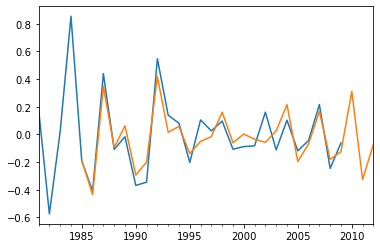

In [18]:
fitted_value = np.zeros((28,4))
for i in range(0,28,4):
    a = var_result.forecast(y = df_train.iloc[i:i+4,:].values, steps=4)
    fitted_value[i:i+4,:] = a

fitted_value = pd.DataFrame(fitted_value, index=pd.period_range(start = '1985',end = '2012',freq = 'Y'), columns=df_train.columns)
#print(df_forecast)

print(rmse(fitted_value.iloc[:-3,0],df_train.iloc[4:,0].values))
plt.figure()
df_train.iloc[:,0].plot()
fitted_value.iloc[:,0].plot()

<AxesSubplot:>

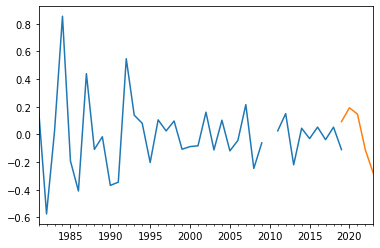

In [19]:
plt.figure()
df.iloc[1:,0].plot()
df_forecast.iloc[:,0].plot()

In [20]:
predict_Test = var_result.forecast(y = df_train.values[-4:], steps=9)
rmse(predict_Test[:,0],df_test.iloc[:,0].values)

0.3032595702368126

In [21]:
predict_Train = var_result.forecast(y = df_train.values[:], steps=26)
rmse(predict_Train[:,0],df_train.iloc[3:,0].values)

0.3088345987588041